<a href="https://colab.research.google.com/github/c-huiya/Comparison-between-Machine-Learning-Models/blob/main/230571H_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
## Import Libraries
# Object manipulation
import statistics
import numpy as np
import pandas as pd
from collections import defaultdict

# Plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns

# Scikit-Learn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.tree import plot_tree

# Analysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
parkinson = pd.read_csv("/content/drive/My Drive/machine learning/parkinson_disease_assignment.csv")
parkinson.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,L
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,L
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,J
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,L
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569,N


In [ ]:
parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      194 non-null    float64
 3   MDVP:Flo(Hz)      194 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          194 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      194 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       194 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#finding out if there are duplicated values
parkinson.duplicated().value_counts()

,count
False,195


In [ ]:
#finding out if there are missing values
parkinson.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),1
MDVP:Flo(Hz),1
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,1
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,1


In [ ]:
#filling missing values with mean value
numerical_cols = parkinson.select_dtypes(include=['number']).columns
column_means = parkinson[numerical_cols].mean()
cleaned_parkinson = parkinson[numerical_cols].fillna(column_means)


#non-numerical columns handled in a separate dataframe
non_numerical_cols = parkinson.select_dtypes(exclude=['number']).columns
for col in non_numerical_cols:
    parkinson[col].fillna(parkinson[col].mode()[0], inplace=True)

parkinson[non_numerical_cols] = parkinson[non_numerical_cols].astype(str)

cleaned_parkinson.shape

(195, 23)

## Split data (Data Preparation)

In [ ]:
X = cleaned_parkinson.drop('status', axis=1)
y = cleaned_parkinson['status']


#split dataset to train and test sets
print('Data size',  X.shape)
print('Label size', y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, shuffle=True)
print('Train data size', y_train.shape[0])
print('Test data size' , y_test.shape[0])

Data size (195, 22)
Label size (195,)
Train data size 136
Test data size 59


#**230571H's Decision Tree**

In [ ]:
clf = tree.DecisionTreeClassifier()
#train the model with train data set
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
clf.n_features_in_

22

In [ ]:
# Get the number of nodes and the depth of the tree
clf.tree_.node_count, clf.tree_.max_depth

(25, 6)

In [ ]:
#check model accracy in terms of test dataset
acc = clf.score(X_test, y_test)
print("Accuracy=", acc)

Accuracy= 0.8813559322033898


In [ ]:
# Separate feature columns and the target column
feature_cols = [x for x in cleaned_parkinson.columns if x != 'status']

print(feature_cols)
print(len(feature_cols), 'features in total')
print(clf.feature_importances_)

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
22 features in total
[0.08290534 0.0350103  0.         0.11099756 0.         0.
 0.         0.         0.         0.         0.         0.13345356
 0.         0.         0.         0.         0.05334902 0.
 0.06996592 0.03000883 0.1261376  0.35817188]


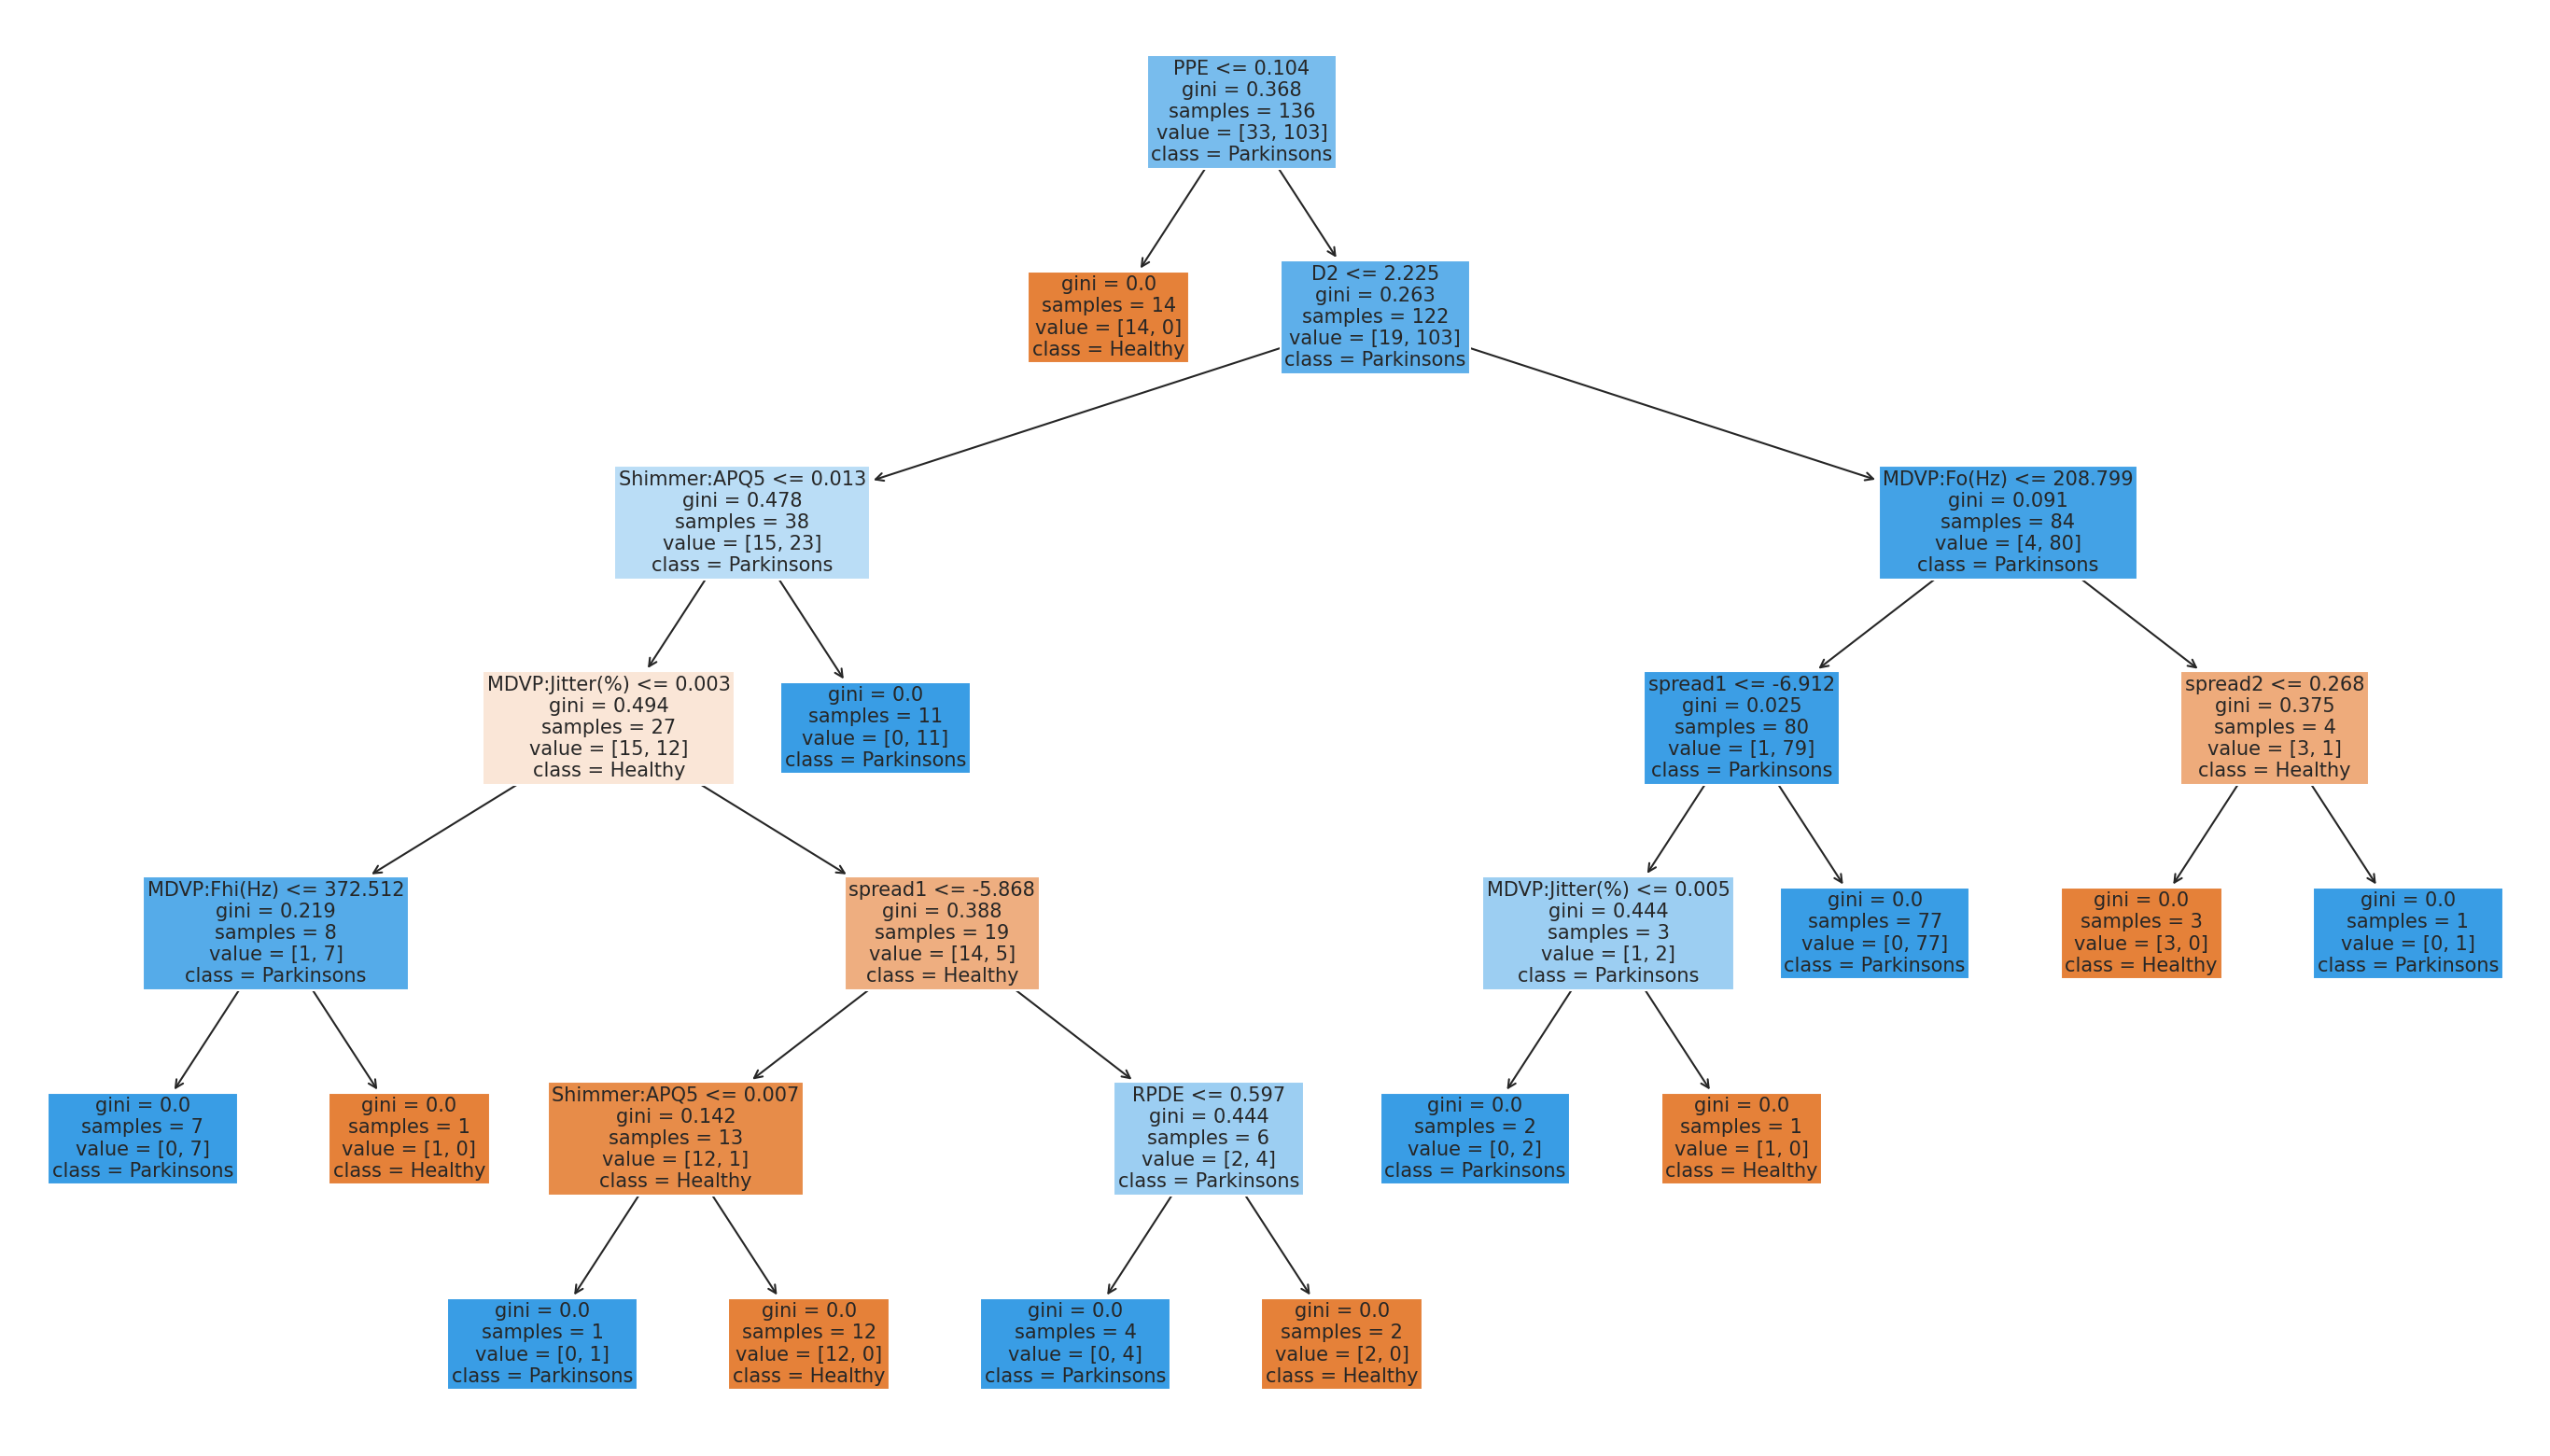

In [ ]:
plt.figure(figsize=(35,20))
plot_tree(clf, feature_names=feature_cols,class_names=['Healthy', 'Parkinsons'], filled=True)
plt.show()

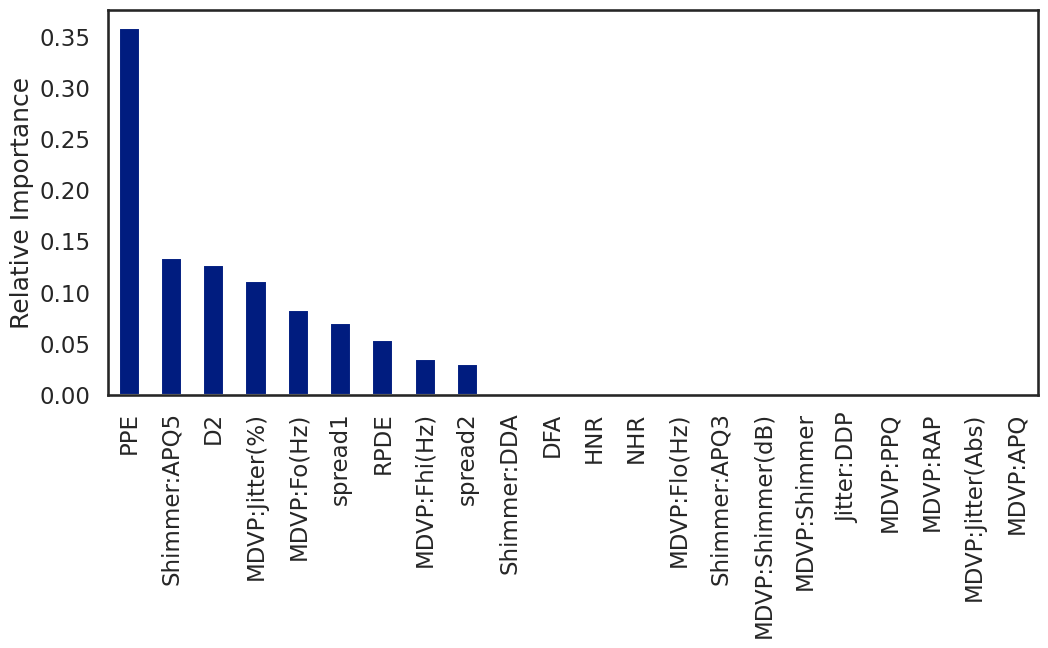

In [ ]:
#plot feature importance
feature_imp = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

In [ ]:
#define a function to return various error metrics
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [ ]:
# Get the performance of the trained model on the training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.881356
precision,1.0,0.911111
recall,1.0,0.931818
f1,1.0,0.921348


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.91      0.93      0.92        44

    accuracy                           0.88        59
   macro avg       0.85      0.83      0.84        59
weighted avg       0.88      0.88      0.88        59



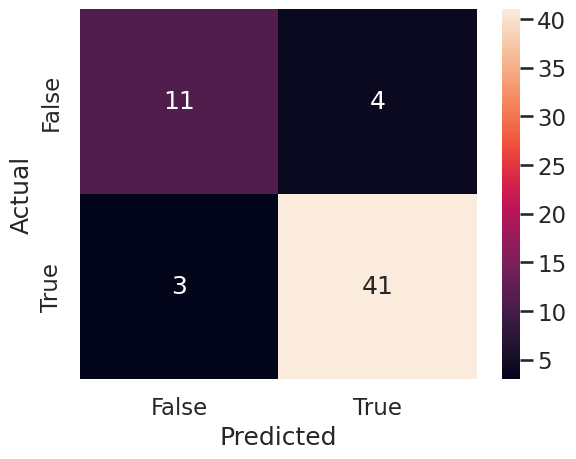

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

## Optimisation & Regularisation

In [ ]:
#search for best layers of the Decision Tree using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#create an serach and evaluation ranges for depth and features
param_grid = {'max_depth': range(1, clf.tree_.max_depth+1, 2),
              'max_features': range(1, len(feature_cols)+1)}

gr_dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid,
                         scoring='accuracy',
                         n_jobs=-1)
gr_dt_clf = gr_dt_clf.fit(X_train, y_train)
gr_dt_clf.best_estimator_.tree_.node_count, gr_dt_clf.best_estimator_.tree_.max_depth #previously was (25,6)

(19, 5)

In [ ]:
gr_dt_clf.best_params_

{'max_depth': 5, 'max_features': 15}

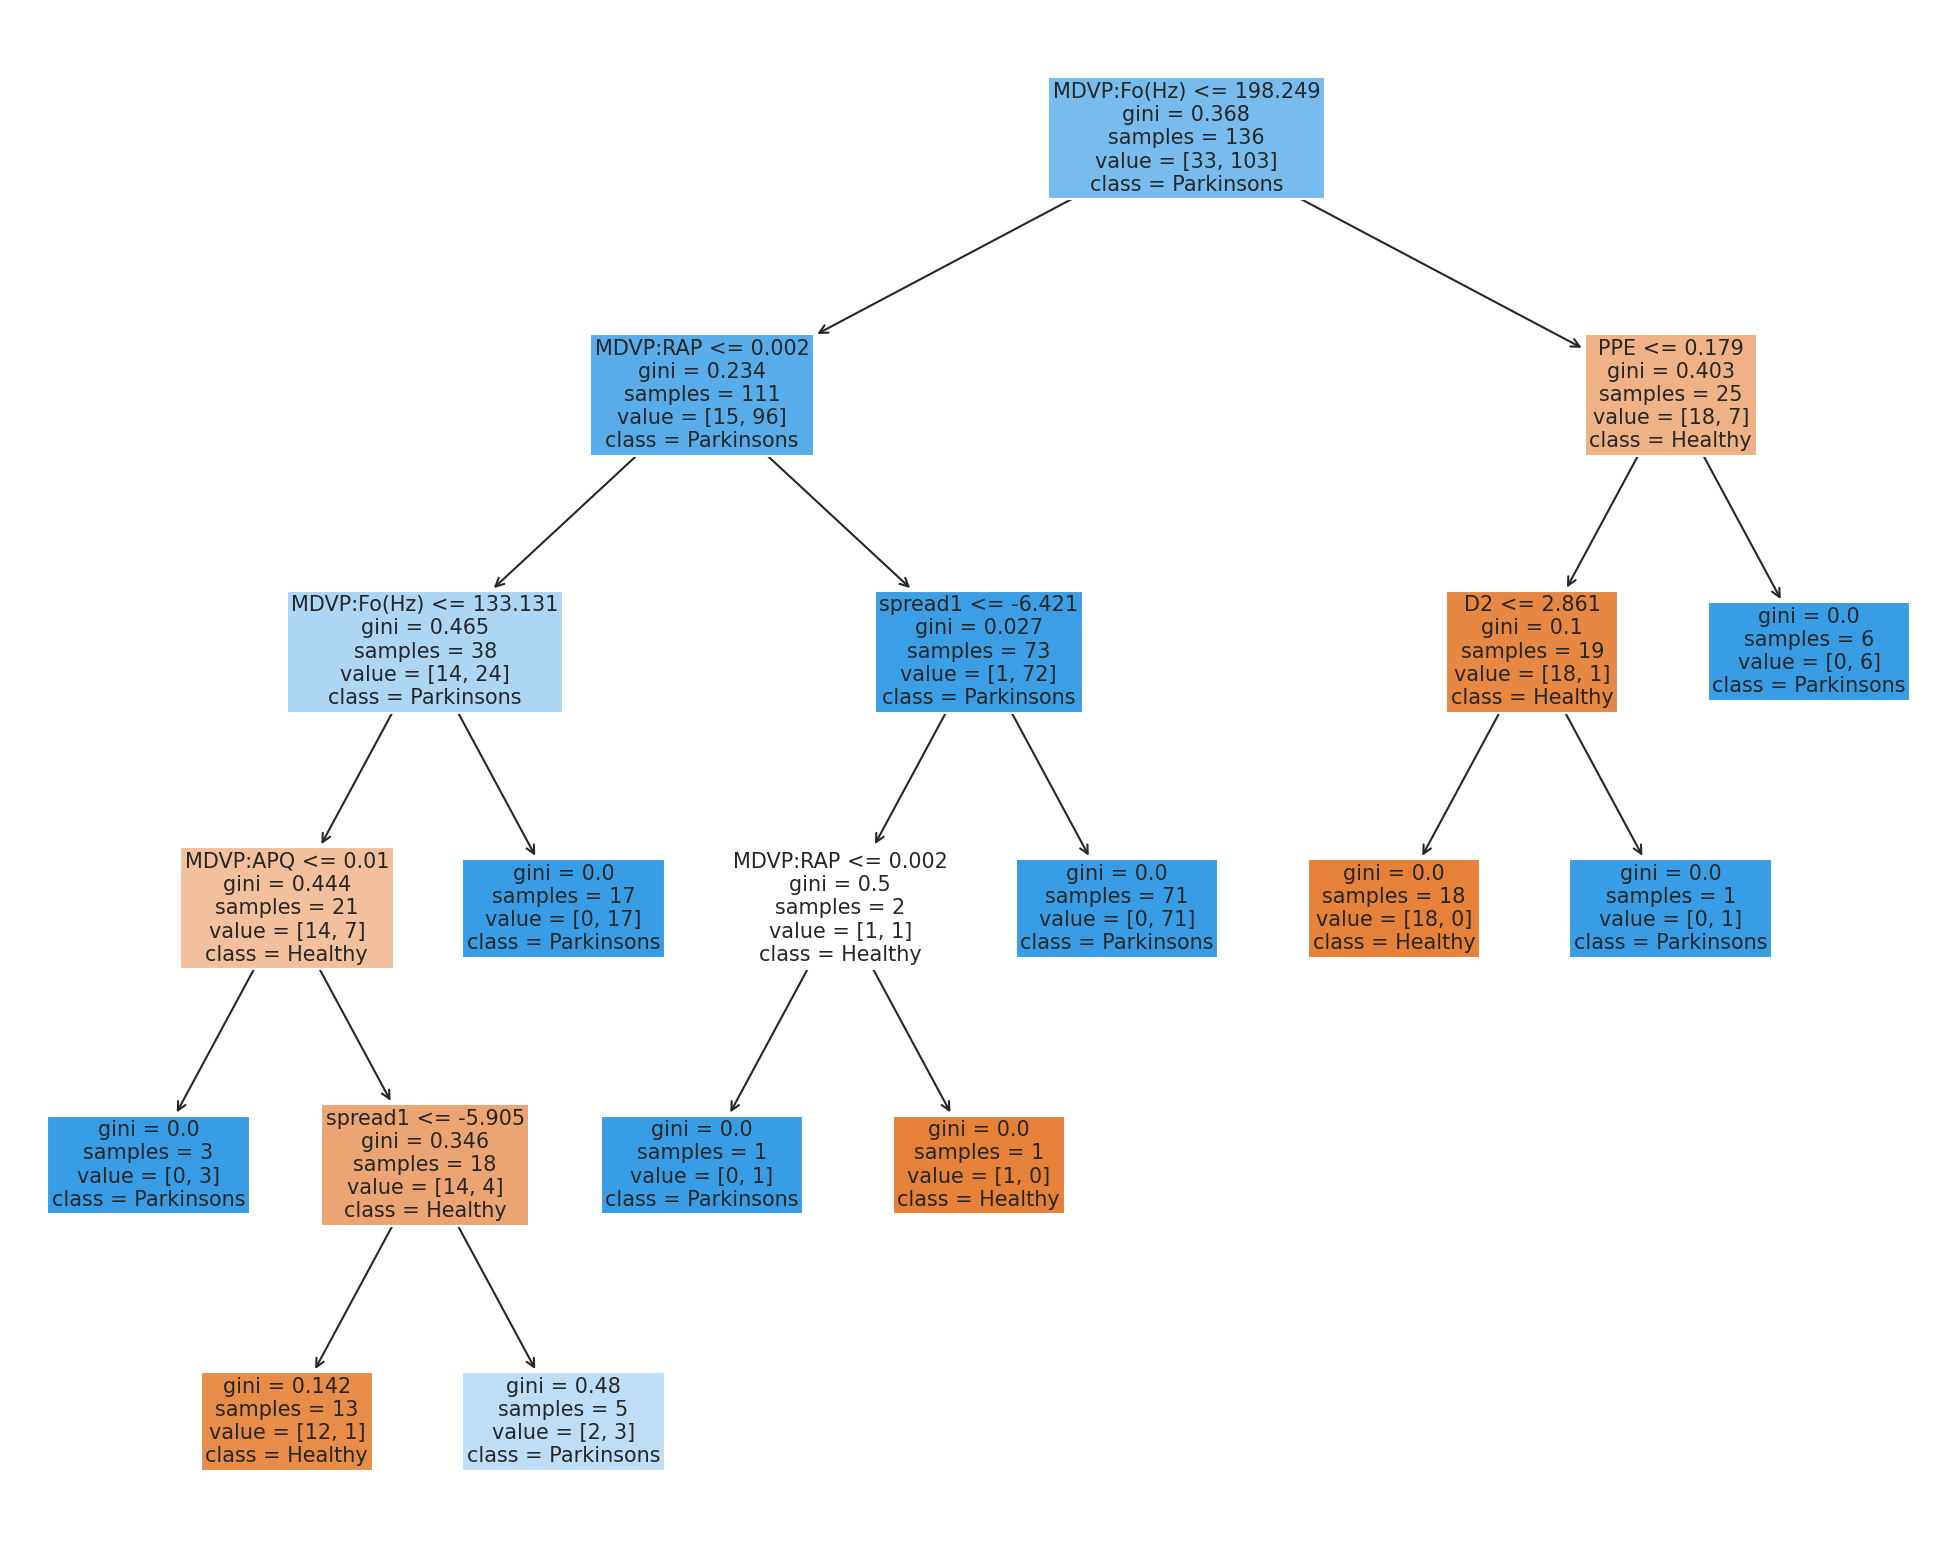

In [ ]:
#plot the optimised tree
plt.figure(figsize=(25,20))
plot_tree(gr_dt_clf.best_estimator_, feature_names=feature_cols, class_names=['Healthy', 'Parkinsons'], filled=True)
plt.show()

              train      test
accuracy   0.977941  0.881356
precision  0.980769  0.930233
recall     0.990291  0.909091
f1         0.985507  0.919540

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.93      0.91      0.92        44

    accuracy                           0.88        59
   macro avg       0.84      0.85      0.85        59
weighted avg       0.88      0.88      0.88        59




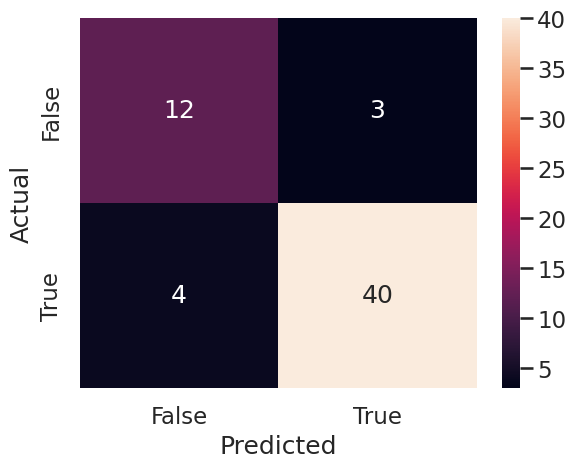

In [ ]:
# The error on the training and test data sets
y_train_pred = gr_dt_clf.best_estimator_.predict(X_train)
y_test_pred = gr_dt_clf.best_estimator_.predict(X_test)

y_train_pred_prob = gr_dt_clf.best_estimator_.predict_proba(X_train)
y_test_pred_prob = gr_dt_clf.best_estimator_.predict_proba(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

print(train_test_full_error)
print()
print(classification_report(y_test, y_test_pred))
print()
# test set prediction results
cm = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

# 230571H's Summary of Decision Tree:
According to the confusion matrix, this model is very accurate as the number of true negatives and true positives are significantly high. Adding on, based on the classification report, the accuracy score is relatively high as well (0.88).

However, after optimisation and regularisation, the confusion matrix and classification report has no difference. I suspect this is due to the dataset having limited data, thus not affecting the confusion matrix and classification report.

Overall, looking at the classification report, it seems like this decision tree does better at predicting & identifying people with Parkinson's Disease rather than healthy people, as the precision, recall and f1-score are much higher for the Parkinson's Disease class compared to the Healthy class.

For the overfitting techniques, I used GridSearch to better determine the optimal max depth and max features.

# **230571H's Ensemble Method: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# ?RandomForestClassifier

# Initialize the random forest estimator
# using oob for model evaluation

rf_clf = RandomForestClassifier(oob_score=True,
                                random_state=42,
                                warm_start=True,
                                n_jobs=-1)

oob_list = list()

# Iterate through a range of numbers of trees
for n_trees in [10, 50, 100, 500, 600, 800, 1000, 1100, 1200, 1300, 1400, 1500]:
    # Use this to set the number of trees
    rf_clf.set_params(n_estimators=n_trees)

    # Fit the model
    rf_clf.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - rf_clf.oob_score_

    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob

,oob
n_trees,
10.0,0.117647
50.0,0.125000
100.0,0.110294
500.0,0.102941
600.0,0.102941
800.0,0.110294
1000.0,0.110294
1100.0,0.110294
1200.0,0.110294


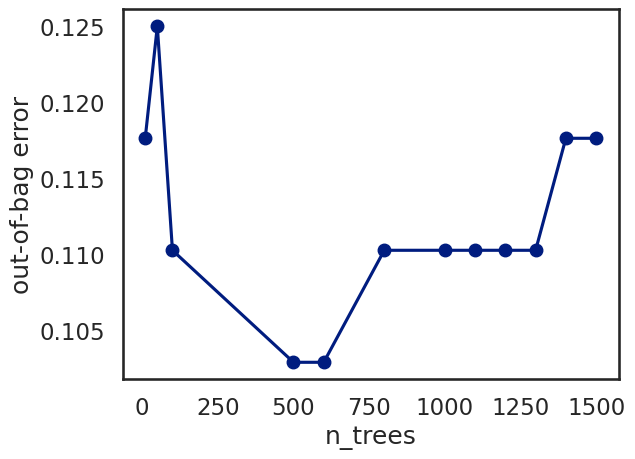

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');



The error appears to have stabilized from around 1000 trees before overfitting.

Plot the graph for easy visualization

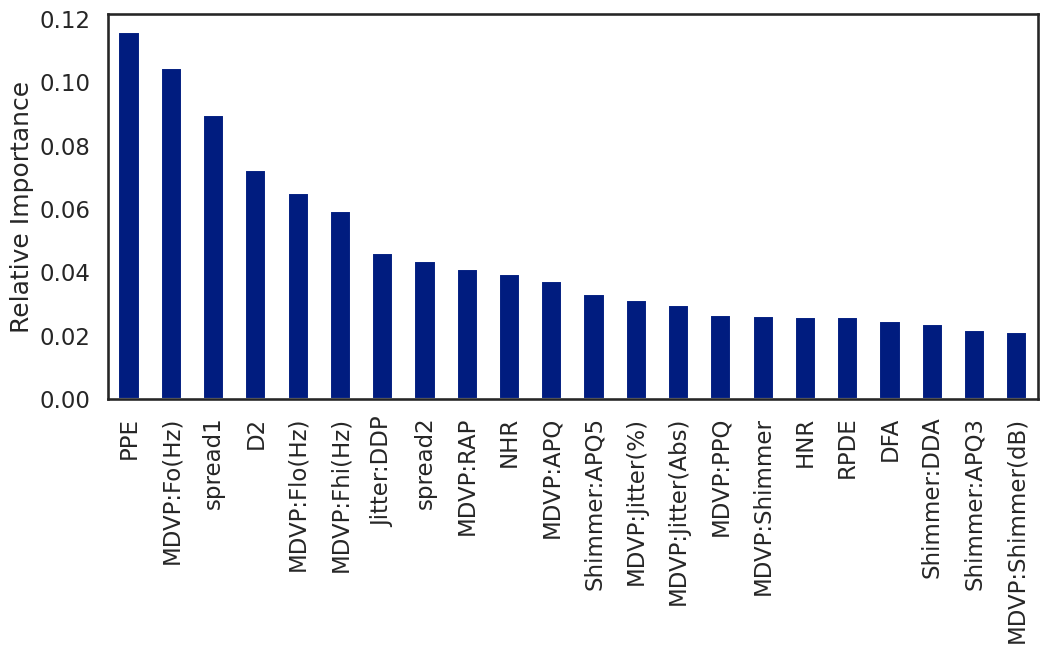

In [ ]:
rf_clf = rf_clf.set_params(n_estimators=1000)

feature_imp = pd.Series(rf_clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rf_clf, X_test, y_test, cv=3, method="predict")
test_error = pd.concat([measure_error(y_test, y_test_pred, 'test')], axis=1)
test_error

,test
accuracy,0.881356
precision,0.911111
recall,0.931818
f1,0.921348


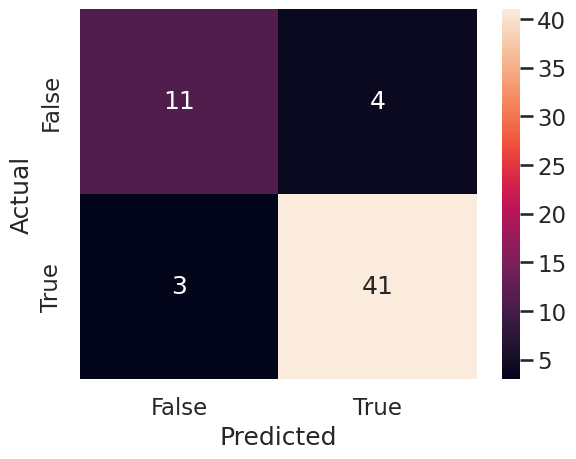

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.91      0.93      0.92        44

    accuracy                           0.88        59
   macro avg       0.85      0.83      0.84        59
weighted avg       0.88      0.88      0.88        59



## Model Optimisation by adjusting the decision threshold

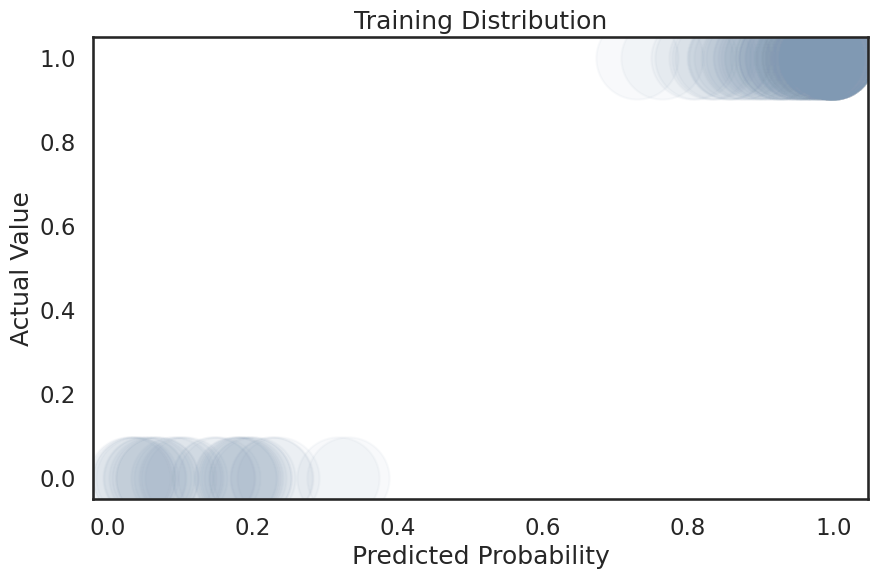

In [ ]:
y_train_pred = rf_clf.predict(X_train)
y_train_pred_prob = rf_clf.predict_proba(X_train)

# Training Distribution map
y_train = y_train.replace(True, 1).replace(False, 0).astype(np.int64)
y_train_scores = y_train_pred_prob[:, 1]
train_predict = pd.DataFrame({'actual': y_train.values,
                              'predict': y_train_scores})

color =np.array([0.5, 0.6, 0.7]).reshape(1,-1)


# Create a scatter plot with varying point sizes and a colormap
# plt.figure(figsize=(10, 6))
# plt.scatter(train_predict['predict'], train_predict['actual'], s=50, alpha=0.05, c=color)

train_predict.plot.scatter(x='predict', y='actual', s=3500, alpha=0.05, figsize=(10,6), c= color)

plt.xlabel('Predicted Probability')
plt.ylabel('Actual Value')
plt.title('Training Distribution')
plt.show()


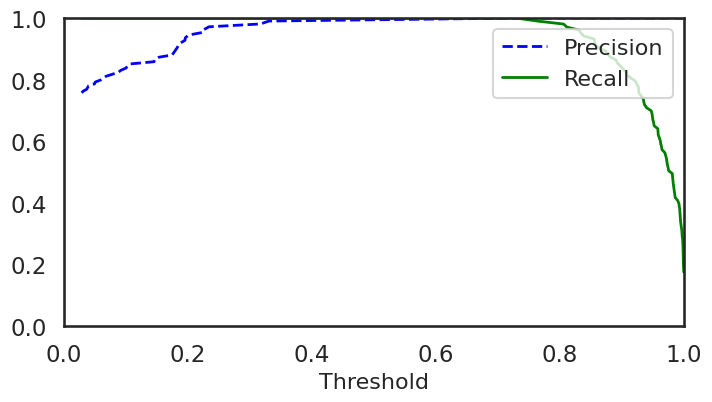

In [ ]:
# plotting precision/recall curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores)

def plot_precision_recall_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper right", fontsize=16)
    plt.xlim([0, 1])
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_curve(precisions, recalls, thresholds)
plt.show()

In [ ]:
# setting decision threshold at 0.4
y_train_pred = (y_train_scores > 0.4)
train_error = pd.concat([measure_error(y_train, y_train_pred, 'train')], axis=1)  #combined in rows
train_error

,train
accuracy,1.0
precision,1.0
recall,1.0
f1,1.0


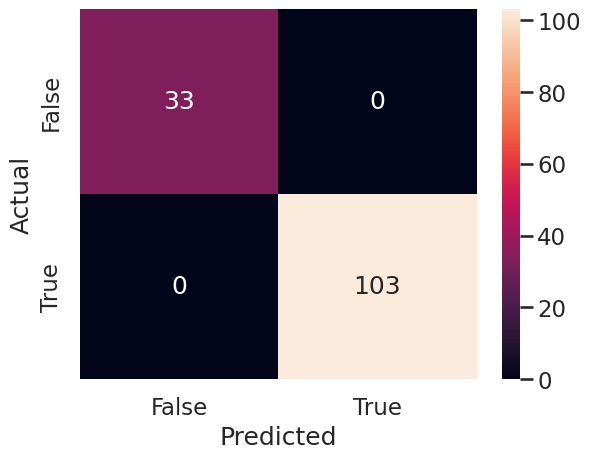

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');


In [ ]:
y_test_pred_prob = rf_clf.predict_proba(X_test)
y_test_scores = y_test_pred_prob[:, 1]
y_test_pred = (y_test_scores > 0.4)
test_error = pd.concat([measure_error(y_test, y_test_pred, 'test')], axis=1)

test_error

,test
accuracy,0.915254
precision,0.897959
recall,1.000000
f1,0.946237


In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[10  5]
 [ 0 44]]


# **230571H's Ensemble Method: AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=42))

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
              'learning_rate': [0.3, 0.1, 0.01]}

gr_ada_clf = GridSearchCV(ada_clf,
                          param_grid=param_grid,
                          scoring='accuracy',
                          n_jobs=-1)

gr_ada_clf = gr_ada_clf.fit(X_train, y_train)

In [ ]:
gr_ada_clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 250}

           train      test
accuracy     1.0  0.864407
precision    1.0  0.909091
recall       1.0  0.909091
f1           1.0  0.909091

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.91      0.91      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.86      0.86      0.86        59




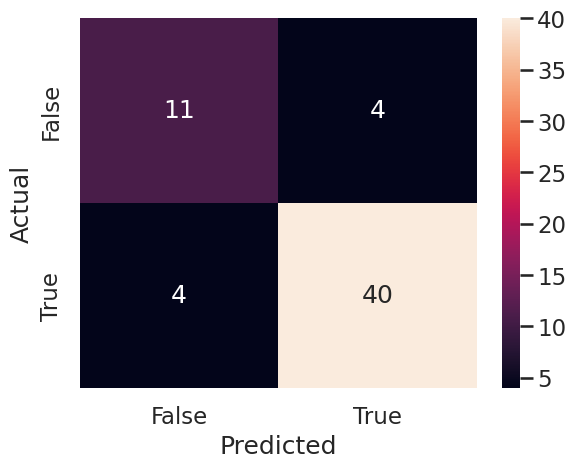

In [ ]:
y_train_pred = gr_ada_clf.predict(X_train)
y_test_pred = gr_ada_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)
print(train_test_full_error)
print()

print(classification_report(y_test, y_test_pred))
print()

cm = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

# **230571H's Ensemble Method: Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200, 300, 400], 'learning_rate': [0.1, 0.01]}

gr_gb_clf = GridSearchCV(GradientBoostingClassifier(max_features=4, random_state=42),
                      param_grid=param_grid,
                      scoring='accuracy',
                      n_jobs=-1)

gr_gb_clf = gr_gb_clf.fit(X_train, y_train)

In [ ]:
gr_gb_clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

           train      test
accuracy     1.0  0.949153
precision    1.0  0.936170
recall       1.0  1.000000
f1           1.0  0.967033

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59




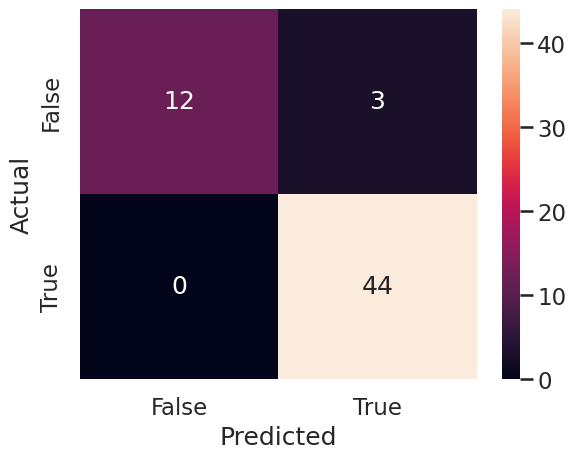

In [ ]:
y_train_pred = gr_gb_clf.predict(X_train)
y_test_pred = gr_gb_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)
print(train_test_full_error)
print()

print(classification_report(y_test, y_test_pred))
print()

cm = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

# 230571H's Summary of Ensemble Method


Gradient Boosting provides the most accurate result, having more true positives and true negatives than the other ensemble methods (AdaBoost and Random Forest). It also shows the highest precision, recall and f1-score out of the 3 different ensemble methods, resulting in better overall accuracy. This shows that it is more reliable and suitable for my model.

According to the oob evaluation graph plotted earlier, the line graph is too unstable, constantly fluctuating, making it very difficult to pinpoint the exact optimal value to use for number of trees. Thus, this makes Random Forest very unreliable and useless.

For the overfitting techniques, the learning rate and n_estimators are chosen through code selection to find out the best parameters to use for both Boosting methods. The Random Forest method requires model optimisation by adjusting its decision threshold, implying that it is preset by me.

# 230571H's Comparison between the 2 models
Since I have established that Gradient Boosting is the best out of the ensemble methods, I will compare the Decision Tree with Ensemble Method: Gradient Boosting.




Below shows the analysis of the Decision Tree:

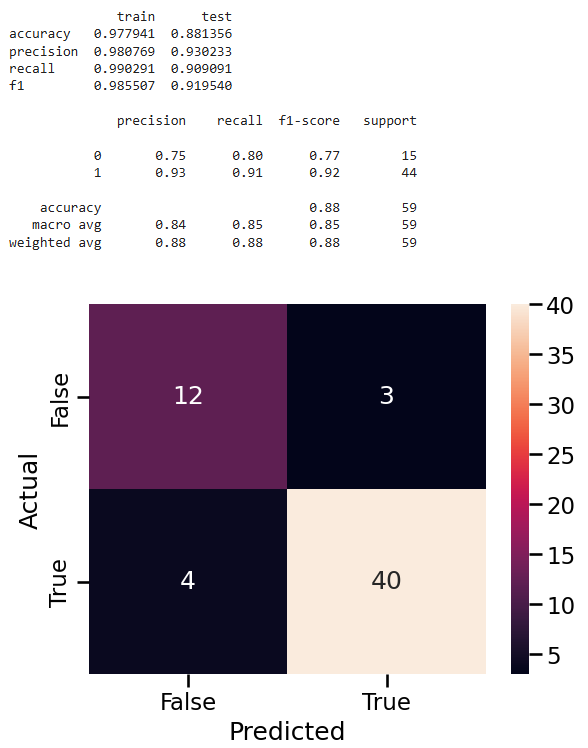

Below shows the confusion matrix of Gradient Boosting:

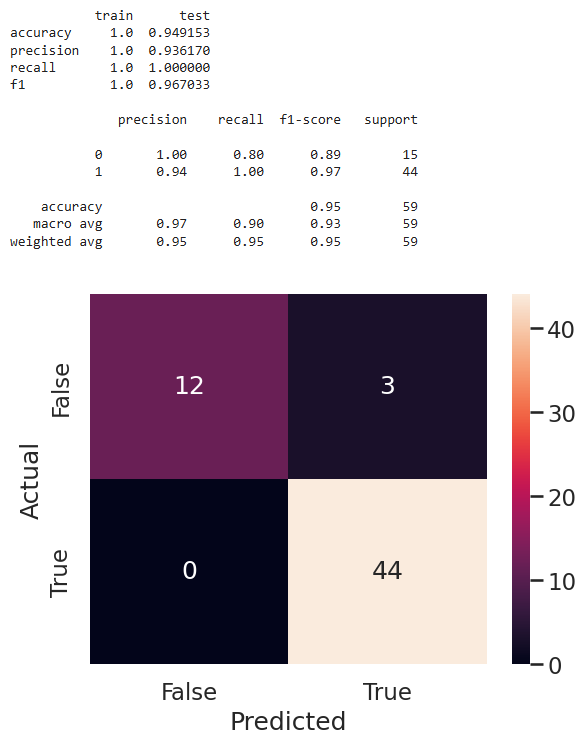

As seen from these 2 images, Gradient Boosting gives a more accurate result, having more true positives than the Decision Tree.

Also, the classification report shows higher precision, recall and f1-score in Gradient Boosting than in Decision Tree, making it more useful for my model.

Additionally, in this context, since we are trying to classify healthy patients and patients with Parkinson's Disease, we have to prioritize recall over precision, as we do not want to miss any cases of Parkinson's Disease. In which case, recall is better than precision in Gradient Boosting while precision is better than recall in Decision Tree. Therefore, for my model, Gradient Boosting is the best overall, unless we're trying to find which features directly decides whether the patient classifies as healthy or has Parkinson's Disease.

In conclusion, the classification report, the training and testing errors and the confusion matrix show that Gradient Boosting is the best, as Gradient Boosting is able to correctly identify those with Parkinson's Disease 100% of the time, having 0 false positives. Furthermore, the training and testing scores accuracy, precision, recall and f1-score are much better in Gradient Boosting than in Decision Tree.